In [1]:
# Set up stlab
from pyplr import stlab
d = stlab.SpectraTuneLab(password='2294b16eea08a15a')
d.turn_off()

LIGHT HUB login success
User authenticated as: admin
The following addresses are defined: [1, 1004, 1023]
Call get_luminaires() / get_device_info() for more info


<Response [200]>

In [2]:
from time import sleep
from pyplr.pupil import PupilCore

p = PupilCore()

p.command('R our_recording')

sleep(1)

p.command('r')

'OK'

In [10]:
p.check_3d_model()

> Refit the 3d model? [y/n]:  y


> Unfreezing 3d model for eye 0
> Unfreezing 3d model for eye 1
> Ask the participant to roll their eyes


> Press "Enter" when ready to freeze the model:  


> Freezing 3d model for eye 0
> Freezing 3d model for eye 1


In [11]:
p = PupilCore()
pgr_future = p.pupil_grabber(topic='pupil.1.3d', seconds=5)

> Grabbing 5 seconds of pupil.1.3d
> PupilGrabber done grabbing 5 seconds of pupil.1.3d


In [12]:
data = pgr_future.result()
data[0]

{'id': 1,
 'topic': 'pupil.1.3d',
 'method': 'pye3d 0.3.0 real-time',
 'norm_pos': [0.442325093945853, 0.8371684918376562],
 'diameter': 43.969959528196306,
 'confidence': 1.0,
 'timestamp': 253323.71815499998,
 'sphere': {'center': [4.9401859515791395,
   -1.5322818469579005,
   27.338268302453404],
  'radius': 10.392304845413264},
 'projected_sphere': {'center': [146.97739446488129, 80.12664000425589],
  'axes': [259.76159544657554, 259.76159544657554],
  'angle': 0.0},
 'circle_3d': {'center': [-0.40137865963017916,
   -3.9608056736993986,
   18.760975050662076],
  'normal': [-0.5139922943625798, -0.23368481418377066, -0.8253504279733475],
  'radius': 1.2449901821336176},
 'diameter_3d': 2.489980364267235,
 'ellipse': {'center': [84.92641803760378, 31.26364956717002],
  'axes': [35.09258303993028, 43.969959528196306],
  'angle': 33.9268669155656},
 'location': [84.92641803760378, 31.26364956717002],
 'model_confidence': 1.0,
 'theta': 1.8066620374516884,
 'phi': -2.1277806686538123}

Text(0.5, 0, 'Pupil timestamp (s)')

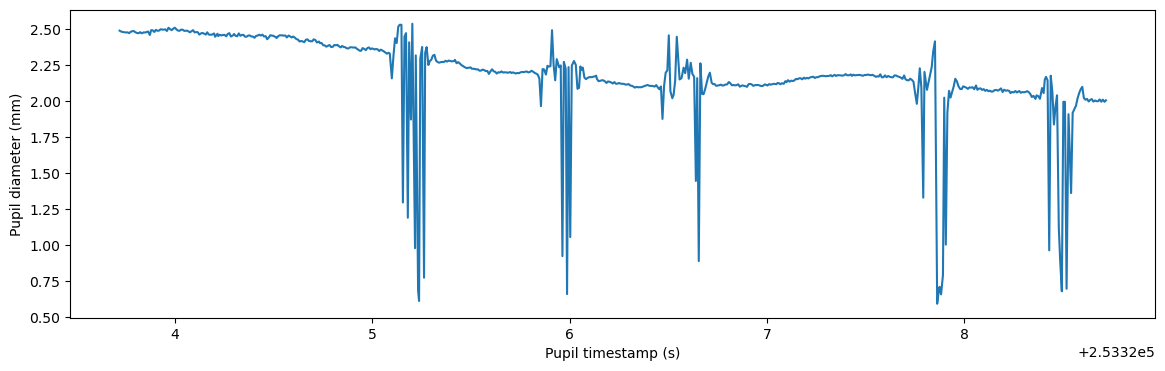

In [13]:
import matplotlib.pyplot as plt
from pyplr.utils import unpack_data_pandas

data = unpack_data_pandas(data, cols=['timestamp','diameter_3d'])
ax = data['diameter_3d'].plot(figsize=(14,4))
ax.set_ylabel('Pupil diameter (mm)')
ax.set_xlabel('Pupil timestamp (s)')